In [1]:
import gdax
public_client = gdax.PublicClient()

In [2]:
import pandas as pd
#https://docs.gdax.com/#get-trades
def rolling_std(data, window, center, min_periods):
    return data.rolling(window, center=center, min_periods=2).std()    

def bollinger_band(data, window = 7, center = False, min_periods = 1):
    mean = data.rolling(window, center=center, min_periods=min_periods).mean()
    std = rolling_std(data, window, center, min_periods)
    return mean, mean + std, mean - std

import logging

def BTC_hist():
    data = public_client.get_product_historic_rates('BTC-USD')
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df[0],unit='s')
    df['date'].dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')    
    return df

def plot_bb(df, window = 20):
    df['close'] = df[1].sort_index(ascending=True)
    df['mean'], df['up'], df['down'] = bollinger_band(df['close'], window = window, center = True)
    plt.plot(df['date'], df['close'], color='red')
    plt.plot(df['date'], df['mean'], color='green')
    plt.plot(df['date'], df['up'], color='blue')
    plt.plot(df['date'], df['down'], color='blue') 

In [3]:
%matplotlib inline
import pylab as plt


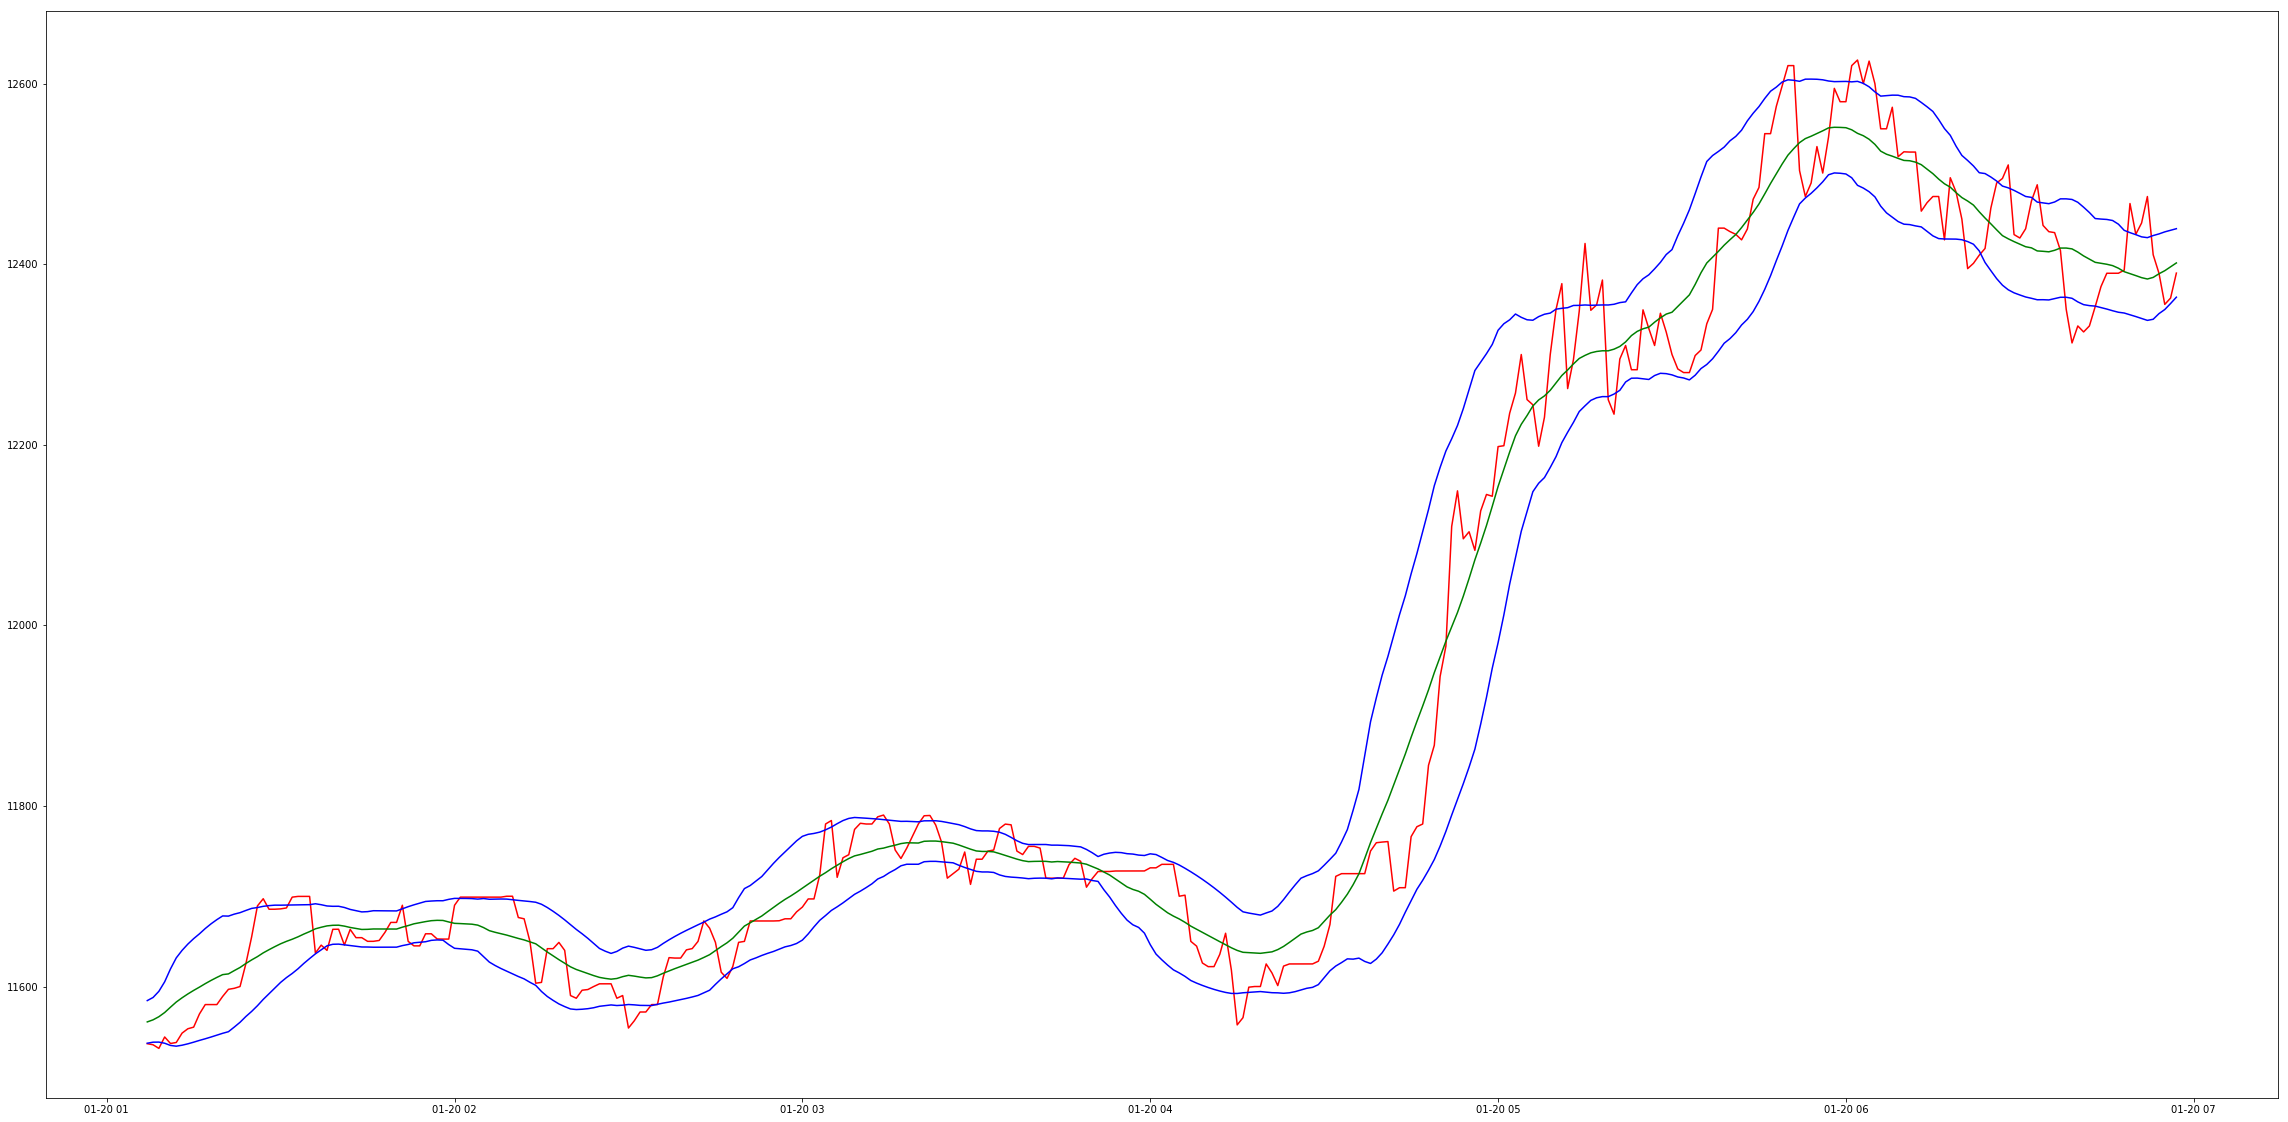

In [4]:
plt.figure(figsize=(40,20))
df = BTC_hist()
plot_bb(df, 30)